In [ ]:
# Initialize Otter; this is for autograding your answers
import otter
grader = otter.Notebook("worksheet7.ipynb")

# # Click into this cell and press shift-enter before using this notebook.
# # This line loads the ability to use %%ai in your file
# %load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import math
%load_ext jupyter_ai_magics

import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# CMPSC 5A, S25, Worksheet 7: Table Manipulation and Visualization

**Reading**: 
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

Please complete this notebook by filling in the cells provided. 

**Throughout this worksheet and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

Each of these is calculated only among people that:
* Are able to work
* Are actively looking for a full-time job.

1. The **Non-Employment Index (NEI)**.  This represents the percentage of people in this group who can't find a job
3. The **Non-Employment Index-Part-Time for Economic Reasons (NEI-PTER)**.  This represents percentage of this group who can't find any job *or* are only working at a part-time job. 

The source of the data is the [Federal Reserve Bank in St. Louis](https://fred.stlouisfed.org/categories/33509).

**Question 1.1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.


In [ ]:
unemployment = ...
unemployment

In [ ]:
grader.check("q1_1")

**Question 1.2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.


In [ ]:
by_nei = ...
by_nei_pter = ...

In [ ]:
grader.check("q1_2")

**Question 1.3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter.


In [ ]:
greatest_nei = ...
greatest_nei

In [ ]:
grader.check("q1_3")

**Question 1.4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.


In [ ]:
pter = ...
print(pter)

In [ ]:
grader.check("q1_4")

**Question 1.5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.


In [ ]:
by_pter = ...
by_pter

In [ ]:
grader.check("q1_5")

**Question 1.6.** 

Create a line plot of the PTER over time. 

To do this, we'll first create an array that consists of the numbers for each quarter.  The numbers will start with `1994`, and go up by `0.25`.  Here's the code for that.  Run the following cell so that you see what the value of `year` is, and try to understand how the code produces that.

In [ ]:
year = 1994 + np.arange(by_pter.num_rows)/4
year

Now, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

In [ ]:
pter_over_time = ...

# Create line plot here

In [ ]:
grader.check("q1_6")   # This only checks the assignment to pter_over_time, not the line plot

We don't have an autograder for the plot, but it should look roughly like this (without the big red `Sample` text across it.)

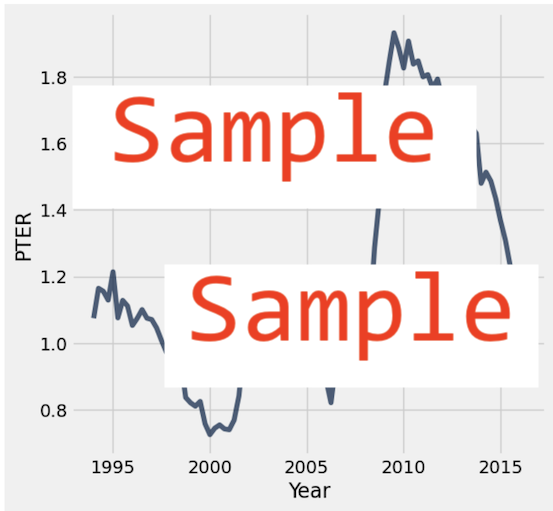

**Question 1.7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 


In [ ]:
highPTER = ...

In [ ]:
grader.check("q1_7")

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [the US Census Bureau](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

The different column descriptions are described in this document: 
* <http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf>

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [ ]:
# Don't change this cell; just run it.
pop = Table.read_table('data/nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

**Question 2.1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?


In [ ]:
# SOLUTION
us_birth_rate = ...
print(us_birth_rate)

In [ ]:
grader.check("q2_1")

**Counting things in `numpy`**

If we have a `numpy` array, we can count the number of things that meet certain criteria by using the sum function with a boolean expression.  That may sound complicated, but some examples may help illustrate the technique.

Suppose we have this array of numbers: 

In [ ]:
numbers = make_array(-30, 40, -70, 6, -23, 50, -23, 7, -8, -80)

We can find how many numbers are greater than zero by doing this:

In [ ]:
greater_than_zero_count = sum(numbers > 0)
greater_than_zero_count

This works because the expression `(numbers > 0)` gives an array of True and False.   Run this cell and check the output:

In [ ]:
numbers > 0

When you sum up an array of `True` and `False` values, you get a `1` for every true value, and `0` for every false value. 
Run this cell and check the output:

In [ ]:
sum(make_array(True, False, False, True))

In a similar fashion, we can find how many numbers are even or odd by checking the remainder after dividing by two and seeing if it's `0` or `1`:

In [ ]:
print(f"numbers={numbers}")
print(f"count of even numbers={np.sum(numbers % 2 == 0)}")
print(f"count of odd numbers={np.sum(numbers % 2 == 1)}")

And we can see how many numbers have an absolute value greater than 35 by doing this:

In [ ]:
sum(abs(numbers) > 35 )

This will help you answer the next question.

**Question 2.2.** The `MIGRATION` column contains estimated annual net migration counts (in and out) by state.  The annual *rate of migration* for a year-long period is the net number of migrations  as a proportion of the population size at the start of the period.  Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%.  

In [ ]:
migration_rates =  ...
movers = ...
print(movers)

In [ ]:
grader.check("q2_2")

**Question 2.3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).


In [ ]:
west_births = ...
print(west_births)

In [ ]:
grader.check("q2_3")

**Question 2.4.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.


In [ ]:
less_than_west_births = ...
print(less_than_west_births)

In [ ]:
grader.check("q2_4")

**Question 2.5.**  In a later question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.


In [ ]:
visualization = ...

In [ ]:
grader.check("q2_5")

**Question 2.6.**   In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. 

Note: You are *not* comparing the *number* of births and the number of deaths; that would be

Rather, you are comparing:
* the annual death *rate* (the total number of deaths in that period as a proportion of the population size at the start of the time period)
* the annual birth *rate* (the total number of births in that period as a proportion of the population size at the start of the time period)

So you may need to create a new table with those columns first.

In [ ]:
# Extra cell in case you want to use it to create an new table


                                  

In [ ]:
# Generate your chart in this cell



We don't have an autograder for charts and graphs, but your charts should look something like this one (without the big `Sample` text on it:

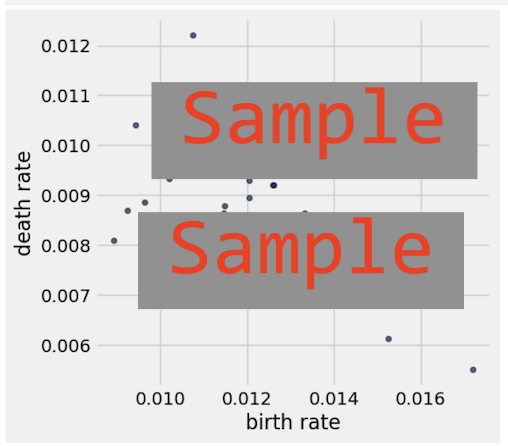


**Question 2.7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. 


In [ ]:
assoc = ...

In [ ]:
grader.check("q2_7")

## 3. Marginal Histograms


Consider the following scatter plot: 

<img src="data/scatter.png">

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

| **Histogram A:** | **Histogram B:** |
|------------------|------------------|
| <img src="data/var1.png"> | <img src="data/var2.png"> |


**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B


In [ ]:
histogram_column_x = ...

In [ ]:
grader.check("q3_1")

<!-- BEGIN QUESTION -->

**Question 2.** State at least one reason why you chose the histogram from Question 1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to either 1 or 2.

1. Histogram A
2. Histogram B


In [ ]:
histogram_column_y = ...

In [ ]:
grader.check("q3_3")

<!-- BEGIN QUESTION -->

**Question 4.** State at least one reason why you chose the histogram from Question 3.  Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").


_Type your answer here, replacing this text._

<!-- END QUESTION -->

## 4. Uber


The code below loads tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. 

* The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride.
* The `hod` column contains codes corresponding to the hour of the day the ride took place.
* The `ride time` column contains the length of the ride, in minutes.

In [ ]:
boston = Table.read_table("data/boston.csv")
manila = Table.read_table("data/manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

<!-- BEGIN QUESTION -->

**Question 1.** Produce histograms of all ride times in Boston using the given bins. 

As a reminder, the format of the method to make a histogram with specified bin sizes is:

```
table_variable.hist("column name", bins=variable_with_bins_in_it)
```



In [ ]:
equal_bins = np.arange(0, 120, 5)
# SOLUTION: make histogram below



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Now, produce histograms of all ride times in Manila using the same equal size bins. 


Keep this line in the code cell; it will ensure that your plots for Boston and Manila use the same scale:

```
plots.ylim(0, 0.05) # Don't delete this line
```

In [ ]:
# SOLUTION: make histogram below

plots.ylim(0, 0.05) # Don't delete this line

**Question 4.3.** We can compute the median of numpy array with `np.median(array)`.  The median is a value that divides the data set into equal size pieces, with the number of values greater than the median and less than the median being equal.

Write code that computes the median value of ride times for both Boston and Manila



In [11]:
boston_median_ride_time = ...
manila_median_ride_time = ...

print(f"Median ride time in Boston: {boston_median_ride_time}")
print(f"Median ride time in Manila: {manila_median_ride_time}")

Median ride time in Boston: Ellipsis
Median ride time in Manila: Ellipsis


In [ ]:
grader.check("q4_3")

**Question 4.4.** The median values and the histograms are very different.  Consider two different people:

* James, who is used to taking Uber in Manila, and is travelling to Boston
* Danielle, who is used to taking Uber in Boston, and is travelling to Manila

Based on your interpretation of these histograms, what could you say to James and to Danielle to help set their expectations?

_Type your answer here, replacing this text._

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()